# **Handbook**


## Computation and Technical Section

## $\underline{Linear \  Discriminant \ Analysis}$ 

We use random classification dataset from scikit learn with 1,000 examples, each with 10 input variables in order to compute the LDA.


In [1]:
# Importing libraries used in analysis 
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

# Ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# create the lda model
model = LinearDiscriminantAnalysis()

# define dataset from scikit learn
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [3]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.893 (0.033)


In [4]:
# Demonstration on classification with new data
# define new data
model = LinearDiscriminantAnalysis()
model.fit(X,y)
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


In [5]:
# Tuning Hyperparameters with GridSearchCV
from sklearn.model_selection import GridSearchCV

# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.893
Config: {'solver': 'svd'}


In [6]:
# Shrinkage
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.894
Config: {'shrinkage': 0.02}


## $\underline{Support \  Vector \ Machines}$



### SVM for Multiclassification

For the SVM, we use wine data from scikit-learn datasets. \\
The dataset is not very big, but its multiclassification to classify the wine class takes a bit different from binary problem as well as the quality metrics consideration.


In [7]:
# Importing Basic Lbraries and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import math
from matplotlib.colors import ListedColormap

# Importing Libraries for SVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

In [8]:
# import scikit-learn dataset library
from sklearn import datasets
# load dataset (Wine Data)
df = datasets.load_wine()

In [9]:
# print the names of the 13 features
print ("Inputs: ", df.feature_names)
# print the label type of wine(class_0, class_1, class_2)
print ("Outputs: ", df.target_names)

Inputs:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs:  ['class_0' 'class_1' 'class_2']


In [10]:
# print the wine labels 
print (df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [11]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# input and outputs
inputs = df.data
outputs = df.target
# Split dataset into training set and test set 25%
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25, random_state=0)

In [12]:
# importing SVM module
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf') # kernel to be set RBF 
svc_poly = SVC(kernel='poly') # kernel to be set Polynomial
svc_li = SVC(kernel='linear') # kernel to be set Linear

# training the models
svc_rbf.fit(X_train,y_train)
svc_poly.fit(X_train,y_train)
svc_li.fit(X_train,y_train)

# testing the models
y_predrbf = svc_rbf.predict(X_test) # RBF
y_predpoly = svc_poly.predict(X_test) # Polynomial
y_predlinear = svc_li.predict(X_test) # Linear

# importing accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy Scores : ")
print("RBF", round(accuracy_score(y_test, y_predrbf),4))
print("Polynomial", round(accuracy_score(y_test, y_predpoly),4))
print("Linear", round(accuracy_score(y_test, y_predlinear),4))

Accuracy Scores : 
RBF 0.8222
Polynomial 0.8444
Linear 0.9778


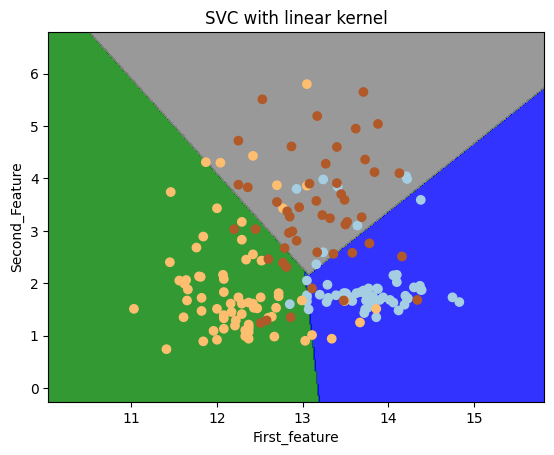

In [14]:
# import some data to play with
from sklearn import svm
# we only take the first two features.
X = df.data[:, :2]  
y = df.target
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
# SVM regularization parameter
C = 1.0 

#kernel is set to be linear
svc_l = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)
#Ploting part
plt.subplot(1, 1, 1)
Z = svc_l.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
plt.xlabel('First_feature')
plt.ylabel('Second_Feature')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

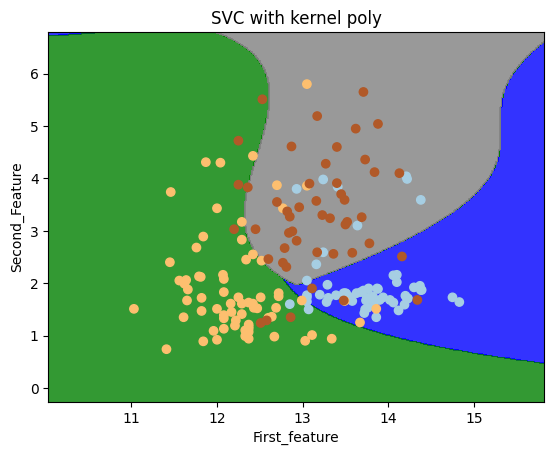

In [15]:
# Kernel is set to be poly
svc_p = svm.SVC(kernel='poly', C=1,gamma='auto').fit(X, y)
#ploting part
plt.subplot(1, 1, 1)
Z = svc_p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
plt.xlabel('First_feature')
plt.ylabel('Second_Feature')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with kernel poly')
plt.show()

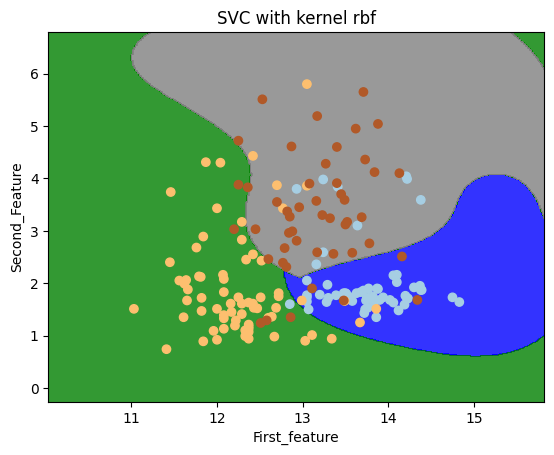

In [16]:
# Kernel is set to be rbf
svc_rbf = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)
#ploting part
plt.subplot(1, 1, 1)
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
plt.xlabel('First_feature')
plt.ylabel('Second_Feature')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with kernel rbf')
plt.show()

### Evaluation on SVM Models

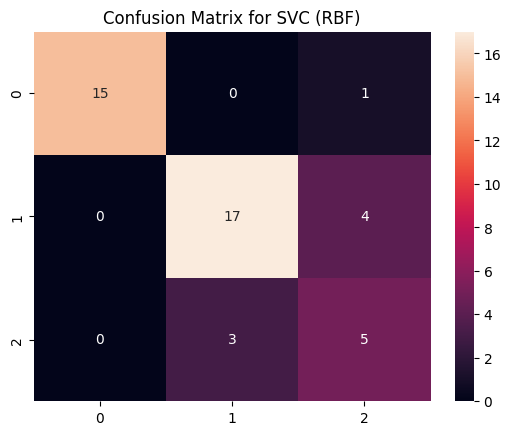

In [17]:
# Importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values for RBF
cm_rbf = confusion_matrix(y_test, y_predrbf)
# true Write data values in each cell of the matrix
sns.heatmap(cm_rbf,annot=True);
plt.title("Confusion Matrix for SVC (RBF)")
plt.show();

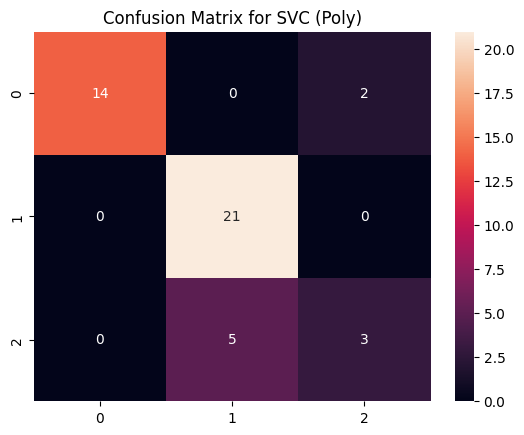

In [18]:
# passing actual and predicted values for Polynomial
cm_poly = confusion_matrix(y_test, y_predpoly)
# true Write data values in each cell of the matrix
sns.heatmap(cm_poly,annot=True);
plt.title("Confusion Matrix for SVC (Poly)")
plt.show();

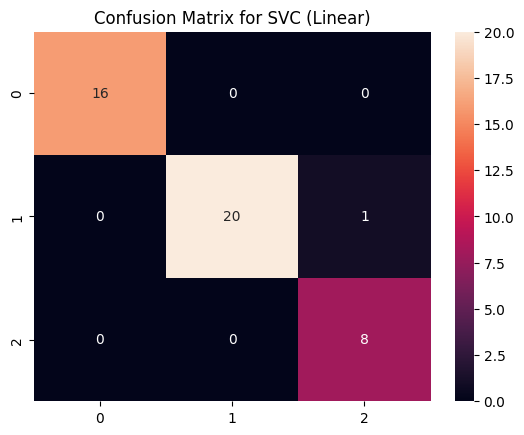

In [19]:
# passing actual and predicted values for Linear
cm_linear = confusion_matrix(y_test, y_predlinear)
# true Write data values in each cell of the matrix
sns.heatmap(cm_linear,annot=True);
plt.title("Confusion Matrix for SVC (Linear)")
plt.show();

In [20]:
# Importing classification report
from sklearn.metrics import classification_report
# printing the report
print("Classification Report for RBF")
print(classification_report(y_test, y_predrbf))
print("Classification Report for Polynomial")
print(classification_report(y_test, y_predpoly))
print("Classification Report for Linear")
print(classification_report(y_test, y_predlinear))

Classification Report for RBF
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.85      0.81      0.83        21
           2       0.50      0.62      0.56         8

    accuracy                           0.82        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.84      0.82      0.83        45

Classification Report for Polynomial
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.81      1.00      0.89        21
           2       0.60      0.38      0.46         8

    accuracy                           0.84        45
   macro avg       0.80      0.75      0.76        45
weighted avg       0.84      0.84      0.83        45

Classification Report for Linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      

In [21]:
# defining parameter range
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    #               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf", "linear", "polynomial"],
}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, cv=5)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...............C=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 2/5] END ...............C=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 3/5] END ...............C=0.001, kernel=rbf;, score=0.370 total time=   0.0s
[CV 4/5] END ...............C=0.001, kernel=rbf;, score=0.385 total time=   0.0s
[CV 5/5] END ...............C=0.001, kernel=rbf;, score=0.385 total time=   0.0s
[CV 1/5] END ............C=0.001, kernel=linear;, score=0.741 total time=   0.0s
[CV 2/5] END ............C=0.001, kernel=linear;, score=0.778 total time=   0.0s
[CV 3/5] END ............C=0.001, kernel=linear;, score=0.852 total time=   0.0s
[CV 4/5] END ............C=0.001, kernel=linear;, score=0.769 total time=   0.0s
[CV 5/5] END ............C=0.001, kernel=linear;, score=0.731 total time=   0.0s
[CV 1/5] END ..........C=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.001, kernel=polynomia

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear', 'polynomial']},
             verbose=3)

In [22]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, kernel='linear')


## $\underline{Neural \  Networks}$ 

Information about the input dataset - Predict whether income exceeds $50K/yr based on census data

The dataset used is US Census data which is an extraction of the 1994 census data which was donated to the UC Irvine’s Machine Learning Repository. The data contains approximately 32,000 observations with over 15 variables. The dependent variable in our analysis will be income level and who earns above $50,000 a year

In [23]:
# general 
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

tf.get_logger().setLevel(logging.ERROR)

# model evaluation
from sklearn.metrics import (
    accuracy_score,
    brier_score_loss,
    classification_report,
    cohen_kappa_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)

# machine learning
from sklearn.model_selection import train_test_split

In [24]:
# Load the loan data
colnames=['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','target'] 


In [25]:
from google.colab import files
uploaded = files.upload()

Saving Adult Data.csv to Adult Data (1).csv


In [26]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Adult Data.csv']), names=colnames, header=None, index_col=False)
# Dataset is now stored in a Pandas Dataframe

data['target'] = np.where(data.target == ' <=50K', 0, 1)

In [27]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [28]:
data.target.value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [29]:
#select 4 features for demonstration
features = ['age','education_num','sex','hours_per_week']
all_ft = features + ['target']
df = data[all_ft]

In [30]:
print([column for column in df.columns if df[column].dtype == object])

['sex']


In [31]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [32]:
# convert categorical
df['sex'] = np.where(df['sex'] == ' Male', 1, 0)
df.sex.value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [33]:
# Select the features and target variable
X = df.drop(['target'], axis=1)
y = df['target']

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
def model_function(dropout_rate, verbose=0):
    # Select a `keras` model, sequential function allows us to specify our neural network architecture
    model = keras.Sequential()
    # First Layer is dense implying that the features are connected to every single node in the first hidden layer
    model.add(Dense(128, kernel_initializer="normal", activation="relu", input_dim=4))
    model.add(Dense(64, kernel_initializer="normal", activation="relu"))
    model.add(Dense(8, kernel_initializer="normal", activation="relu"))
    # Drop out is added to ignore irrelevant neurons
    model.add(Dropout(dropout_rate))
    # We add sigmoid to classify the target
    model.add(Dense(1, activation="sigmoid"))
    # the loss function is binary cross entropy because the problem is a binary classification
    model.compile(loss="binary_crossentropy", optimizer="rmsprop")
    return model

In [36]:
model = KerasClassifier(
    build_fn=model_function, dropout_rate=0.2, verbose=0, batch_size=50, epochs=100
)
model.fit(X_train, y_train)
y_predict_dl = model.predict(X_test)

204/204 [==============================] - 0s 1ms/step


In [37]:
ROC_AUC_metric = roc_auc_score(y_test, pd.DataFrame(y_predict_dl.flatten()))
print("Deep Learning ROC AUC is {:.4f}".format(ROC_AUC_metric))

Deep Learning ROC AUC is 0.6354


In [38]:
print("\nClassification Report for deep learning model")
print(classification_report(y_test, y_predict_dl.flatten()))


Classification Report for deep learning model
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5026
           1       0.73      0.30      0.43      1487

    accuracy                           0.82      6513
   macro avg       0.78      0.64      0.66      6513
weighted avg       0.80      0.82      0.78      6513



In [39]:
print("\nThe brier score is equal to ")
brier_score_loss(y_test, y_predict_dl.flatten(), pos_label=1)


The brier score is equal to 


0.18486104713649623

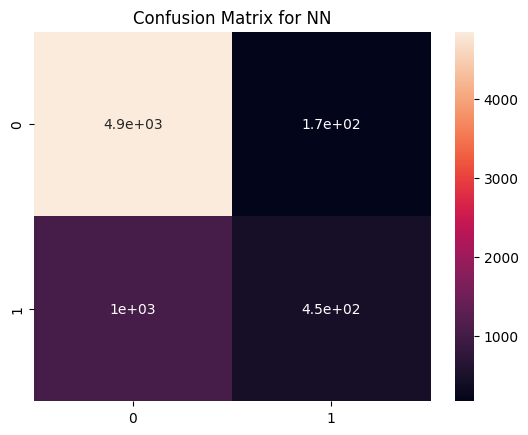

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm_NN = confusion_matrix(y_test, y_predict_dl.flatten())
# true Write data values in each cell of the matrix
sns.heatmap(cm_NN,annot=True);
plt.title("Confusion Matrix for NN")
plt.show();

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_predict_dl)
auc = round(ROC_AUC_metric,4)

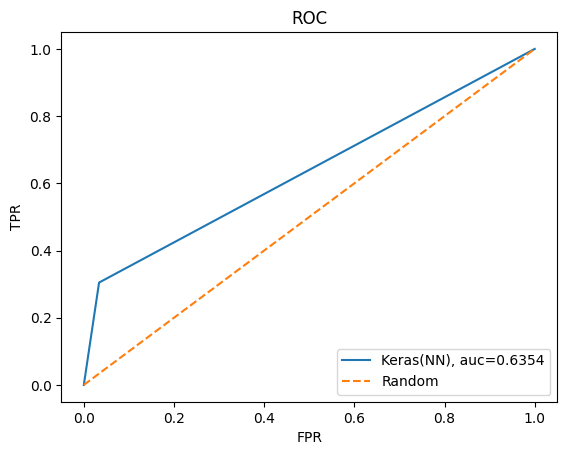

In [42]:
plt.plot(fpr, tpr, label="Keras(NN), auc=" + str(auc))
plt.plot(fpr, fpr, "--", label="Random")
plt.legend(loc=4)
plt.title("ROC")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show();